## Tree cover analysis
Data Soruce:https://archive.ics.uci.edu/ml/datasets/Covertype


**Name / Data Type / Measurement / Description**

* Elevation / quantitative /meters / Elevation in meters 
* Aspect / quantitative / azimuth / Aspect in degrees azimuth 
* Slope / quantitative / degrees / Slope in degrees 
* Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features 
* Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features 
* Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway 
* Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice 
* Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice 
* Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice 
* Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points 
* Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation 
* Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation 
* Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

## Extract the data from the CSV file
   * the data be store into **copydata**

In [126]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline 
#generate graph between cells and store it


In [127]:
#read csv file

with open('covtype.data', newline='') as csvfile:
    trainingdata = csv.reader(csvfile, delimiter=',')
    
    i=0
    copydata=[]
    for row in trainingdata:
        copydata.append(row)
        i = i+1
    
#print((copydata[0]))

## Help Fuctions
**Reduce the dimention of the data**

* Notice that original data use 4 columns to note the areas and 40 columns for the soil type. It may reduce the accuracy and speed when we train the data. So we use the **reduce_dim** to fold the columns which are redundant.

In [128]:
def reduce_dim(data,i,j,p,q):
    rdata=[]
    for row in data:
        x=np.argmax(row[i:j])+1
        y=np.argmax(row[p:q])+1
        rdata.append(row[:i]+[x,y]+row[q:])
    
    return(rdata)

* We reduce the data dimention by fold columns of areas and soil types 
(which represented by binary originally), we now remark the area and soil type by numbers and **data** is the dimention-reduced data set.


In [129]:

data=reduce_dim(copydata,10,14,14,-1)
data=np.asarray(data)

print(data[0])
print(len(copydata))


['2596' '51' '3' '258' '0' '510' '221' '232' '148' '6279' '1' '29' '5']
581012


## Plot Tools

In [178]:
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['font.size']=5
plt.rcParams["figure.figsize"]=[6,6]

def bar(x_label,y):
    x=[i for i in range(len(y))]
    plt.bar(x,y,tick_label=x_label,log=False,width=0.9)
    plt.xlabel('Attribute')
    plt.ylabel('Importance')
    plt.title('Relative Importance of Attribute')

In [179]:
def hist(ax,x,xlabel):

    class_label=['Spruce/Fir', 'Lodgepole Pine', 
                 'Ponderosa Pine', 'Cottonwood/Willow',
                 'Aspen', 'Douglas-fir', 'Krummholz']
    
    class_num=len(class_label)
    cs=cm.rainbow(np.linspace(0,1,class_num)) 
    
    ax.hist(x,color=cs,stacked=True,rwidth=0.8,label=class_label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("# of Observation")
    ax.legend(loc=2, prop={'size': 15})
    
    

    

## Find the relative Importance of Attributes
**We evaluate the importaance by the ExtraTreeClassifier**
* Notice that Elevetion is the most importance attribute when classifying data

[ 0.15098072  0.11474779  0.02263689  0.12181428  0.05342556  0.17962069
  0.03698761  0.06560165  0.04507537  0.06793389  0.          0.14117554]


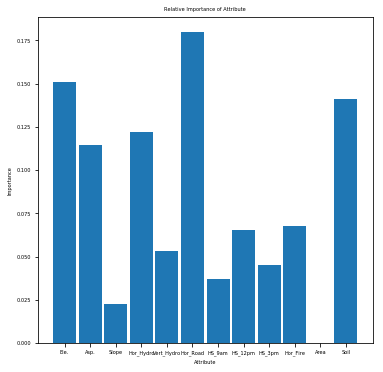

In [180]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier()
forest.fit(data[:50,:12],data[:50,12])

Importances = forest.feature_importances_
Attributes=['Ele.', 'Asp.', 'Slope','Hor_Hydro','Vert_Hydro','Hor_Road', 'HS_9am', 'HS_12pm','HS_3pm', 'Hor_Fire', 'Area', 'Soil' ]

bar(Attributes,Importances)
print(Importances)

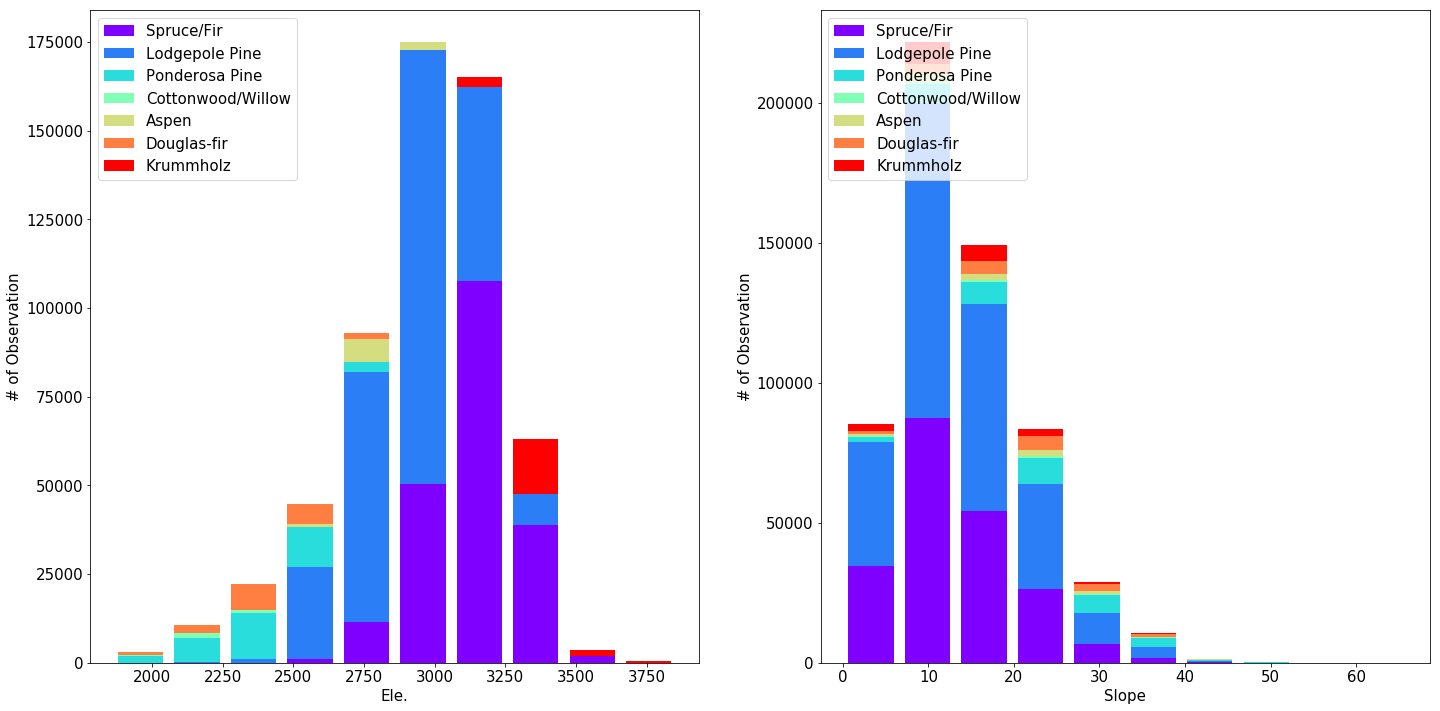

In [133]:
#take elevation and slope classified by cover type
Ele_by_class=[]
for i in range(1,8):
    class_i = [int(row[0]) for row in data if int(row[-1])==i]
    Ele_by_class.append(class_i)
    
Slope_by_class=[]
for i in range(1,8):
    class_i = [int(row[2]) for row in data if int(row[-1])==i]
    Slope_by_class.append(class_i)



fig , (ax1,ax2) =plt.subplots(1,2,figsize=(24,12))
hist(ax1,Ele_by_class,Attributes[0])
hist(ax2,Slope_by_class,Attributes[2])
